In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import xgboost as xgb

## Input data

## Lasso Regularization

In [4]:
# scaler = StandardScaler()
# X_scale = scaler.fit_transform(X)
# # X_testScale = scaler.transform(X_test)

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [6]:
# from sklearn.feature_selection import SelectFromModel


# sel_ = LassoCV(alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], max_iter=10000, cv=5)
# sel_.fit(X_train, y_train)
# print(sel_.score(X_train, y_train))
# print(sel_.score(X_test, y_test))

In [7]:
# np.abs(sel_.coef_)

In [8]:
# selected_feat = X.columns[(sel_.get_support().tolist())]
# print('total features: {}'.format((X.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#       np.sum(sel_.estimator_.coef_ == 0)))

In [9]:
# removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
# removed_feats

In [10]:
# dfFull = dfFull.drop(removed_feats, axis=1)
# dfFull.shape

In [11]:
# # Train the model with XGBoost
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2,
#                 max_depth = 10, n_estimators = 400)
# xg_reg.fit(X_train, y_train)

# preds = xg_reg.predict(X_train)
# print('Train evaluation')
# print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_train, preds, squared=False)))
# print('R2: ',round( r2_score(y_train, preds),3))
# print('-'*20)
# preds = xg_reg.predict(X_test)
# print('Test evaluation')
# print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_test, preds, squared=False)))
# print('R2: ',round( r2_score(y_test, preds),3))

## Selected Feature

In [2]:
# df = pd.read_csv('../Dataset/selected_feature.csv')
# df.dropna(inplace=True)
# df.head(2)

,originalRate,starRating,size,HAIR_DRYER,BATHTUB,PRIVATE_POOL,IN_ROOM_SAFE
0,1227273,4.0,46.0,1.0,1.0,0.0,1.0
1,596694,4.0,31.0,1.0,1.0,0.0,1.0


In [12]:
# X = df.drop('originalRate', axis=1)
# y = df['originalRate']

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4700, 6) (248, 6) (4700,) (248,)


In [14]:
# sum(y_train)/len(y_train)

In [15]:
# sum(y_test)/len(y_test)

In [16]:
# Train the model with XGBoost
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1,
#                 max_depth = 100, n_estimators = 400)
# xg_reg.fit(X_train, y_train)

# print('Train evaluation')
# preds = xg_reg.predict(X_train)
# print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_train, preds, squared=False)))
# print('R2: ', round(r2_score(y_train, preds),3))

# preds = xg_reg.predict(X_test)
# print('Test evaluation')
# print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_test, preds, squared=False)))
# print('R2: ', round(r2_score(y_test, preds),3))

Train evaluation
RMSE:  1,492,569
R2:  0.837
Test evaluation
RMSE:  2,830,370
R2:  0.537


### Selected features

## Full Feature

In [3]:
dfFull = pd.read_csv('../Dataset/full_feature.csv')
dfFull.dropna(inplace=True)
dfFull.head(2)

,originalRate,size,starRating,AIR_CONDITIONING,BALCONY_TERRACE,BATHROBES,BATHTUB,BLACKOUT_DRAPES_CURTAINS,COFFEE_TEA_MAKER,COMPLIMENTARY_BOTTLED_WATER,...,PARK,HOSPITAL,MUSEUM,GALLERY,PLACE_OF_WORSHIP,TRAIN_STATION,ZOO,ENTERTAINMENT,GARDEN.1,THEATER
0,1227273,46.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,596694,31.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = dfFull.drop('originalRate', axis=1)
y = dfFull['originalRate']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4625, 293) (244, 293) (4625,) (244,)


In [19]:
# Train the model with XGBoost
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 100, n_estimators = 400)
xg_reg.fit(X_train, y_train)

print('Train evaluation')
preds = xg_reg.predict(X_train)
print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_train, preds, squared=False)))
print('R2: ', round(r2_score(y_train, preds),3))

preds = xg_reg.predict(X_test)
print('Test evaluation')
print('RMSE: ', '{0:,.0f}'.format(mean_squared_error(y_test, preds, squared=False)))
print('R2: ', round(r2_score(y_test, preds),3))


Train evaluation
RMSE:  669,175
R2:  0.967
Test evaluation
RMSE:  1,965,216
R2:  0.796


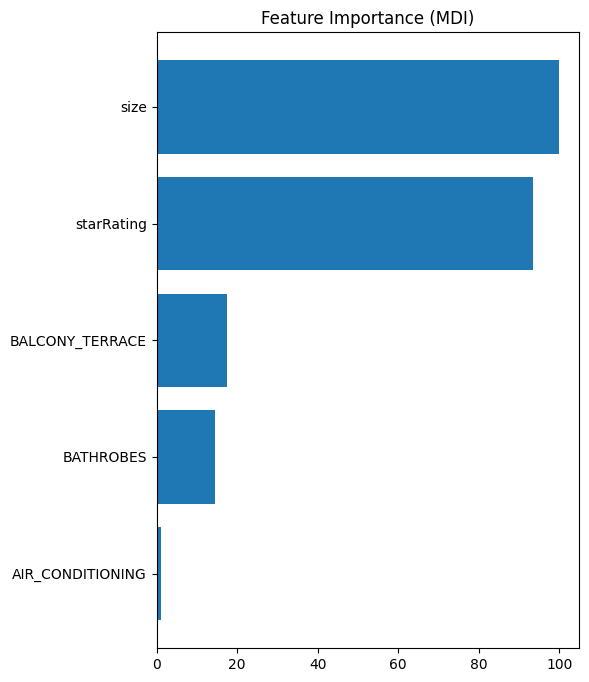

In [20]:
xg_reg.feature_importances_

feature_importance = xg_reg.feature_importances_[:5]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()